In [86]:
import numpy as np
import pandas as pd
import matplotlib as plt
import requests
from tqdm import tqdm

In [32]:
hardCodedFileList = ['a0R4a000000OMJgEAO.json', 'a0R4a000000OOysEAG.json', 'a0R4a000000P71YEAS.json', 'a0R4a000000Pd7IEAS.json', 'a0R4a000000Pd7NEAS.json', 'a0R4a000000Pd8QEAS.json', 'a0R4a000000PiTuEAK.json', 'a0R4a000000PjaAEAS.json', 'a0R4a000000PjSoEAK.json', 'a0R4a000000PrgtEAC.json', 'a0R4a000000PrZgEAK.json', 'a0R4a000000PvKQEA0.json', 'a0R4a000000PvP1EAK.json', 'a0R4a000000PvSyEAK.json', 'a0R4a000000PwooEAC.json', 'a0R4a000000Q4n1EAC.json', 'a0R4a000000Q4n6EAC.json', 'a0R4a000000Q4nwEAC.json', 'a0R4a000000Q4pdEAC.json', 'a0R4a000000Q4pnEAC.json', 'a0R4a000000Q4pxEAC.json', 'a0R4a000000Q4q2EAC.json', 'a0R4a000000Q4qbEAC.json', 'a0R4a000000Q4rfEAC.json', 'a0R4a000000Q4taEAC.json', 'a0R4a000000Qa3eEAC.json', 'a0R4a000000Qa3tEAC.json', 'a0R4a000000Qa5kEAC.json', 'a0R4a000000QA9NEAW.json', 'a0R4a000000QaaJEAS.json', 'a0R4a000000QaaOEAS.json', 'a0R4a000000QamKEAS.json', 'a0R4a000000QaNeEAK.json', 'a0R4a000000QaRMEA0.json', 'a0R4a000000QaSFEA0.json', 'a0R4a000000QaYXEA0.json', 'a0R4a000000QCrPEAW.json', 'a0R4a000000QCshEAG.json', 'a0R4a000000QCsmEAG.json', 'a0R4a000000QCunEAG.json', 'a0R4a000000QCwwEAG.json', 'a0R4a000000QCxGEAW.json', 'a0R4a000000QCxVEAW.json', 'a0R4a000000QCynEAG.json', 'a0R4a000000QCyOEAW.json', 'a0R4a000000QD00EAG.json', 'a0R4a000000QD0eEAG.json', 'a0R4a000000QD18EAG.json', 'a0R4a000000QD1DEAW.json', 'a0R4a000000QD1NEAW.json', 'a0R4a000000QD5FEAW.json', 'a0R4a000000QD5ZEAW.json', 'a0R4a000000QD7LEAW.json', 'a0R4a000000QD7uEAG.json', 'a0R4a000000QD8JEAW.json', 'a0R4a000000QD92EAG.json', 'a0R4a000000QDAFEA4.json', 'a0R4a000000QDHuEAO.json', 'a0R4a000000QDq2EAG.json', 'a0R4a000000QDQOEA4.json', 'a0R4a000000QDrAEAW.json', 'a0R4a000000QDS5EAO.json', 'a0R4a000000QDt1EAG.json', 'a0R4a000000QDUkEAO.json', 'a0R4a000000QDvREAW.json', 'a0R4a000000QDxXEAW.json', 'a0R4a000000QE3BEAW.json', 'a0R4a000000Qeb9EAC.json', 'a0R4a000000QeZ7EAK.json', 'a0R4a000000Qf41EAC.json', 'a0R4a000000QGk0EAG.json', 'a0R4a000000QGl8EAG.json', 'a0R4a000000QLfmEAG.json', 'a0R4a000000QMMLEA4.json', 'a0R4a000000QNR1EAO.json', 'a0R4a000000QS0UEAW.json', 'a0R4a000000QS2VEAW.json', 'a0R4a000000QSDxEAO.json', 'a0R4a000000QsHbEAK.json', 'a0R4a000000QsKBEA0.json', 'a0R4a000000QsKkEAK.json', 'a0R4a000000QV5iEAG.json', 'a0R4a000000QV8NEAW.json', 'a0R4a000000QV9aEAG.json', 'a0R4a000000QVAOEA4.json', 'a0R4a000000QVc5EAG.json', 'a0R4a000000QVceEAG.json', 'a0R4a000000QVctEAG.json', 'a0R4a000000QVeXEAW.json', 'a0R4a000000QVgsEAG.json', 'a0R4a000000QVhlEAG.json', 'a0R4a000000QVj3EAG.json', 'a0R4a000000QVjNEAW.json', 'a0R4a000000QVjOEAW.json', 'a0R4a000000QVM7EAO.json', 'a0R4a000000QVmREAW.json', 'a0R4a000000QVmvEAG.json', 'a0R4a000000QVMvEAO.json', 'a0R4a000000QVNUEA4.json', 'a0R4a000000QVpfEAG.json', 'a0R4a000000QVPzEAO.json', 'a0R4a000000QVQiEAO.json', 'a0R4a000000QvrgEAC.json', 'a0R4a000000QVSKEA4.json', 'a0R4a000000QvtIEAS.json', 'a0R4a000000QVtNEAW.json', 'a0R4a000000QvtrEAC.json', 'a0R4a000000QVV4EAO.json', 'a0R4a000000QVVTEA4.json', 'a0R4a000000QVX0EAO.json', 'a0R4a000000QVX5EAO.json', 'a0R4a000000QVZuEAO.json', 'a0R4a000000QW9LEAW.json', 'a0R4a000000QwauEAC.json', 'a0R4a000000QwbJEAS.json', 'a0R4a000000QWCUEA4.json', 'a0R4a000000QwecEAC.json', 'a0R4a000000QwfQEAS.json', 'a0R4a000000Qwi1EAC.json', 'a0R4a000000QwjrEAC.json', 'a0R4a000000QWPEEA4.json', 'a0R4a000000QWQqEAO.json', 'a0R4a000000QWQvEAO.json', 'a0R4a000000QWVCEA4.json', 'a0R4a000000QwZXEA0.json', 'a0R4a000000QZaXEAW.json', 'a0R4a000000QZHzEAO.json', 'a0R4a000000QZKCEA4.json', 'a0R4a000000QZLFEA4.json', 'a0R4a000000QZMNEA4.json', 'a0R4a000000QZNHEA4.json', 'a0R4a000000QZPMEA4.json', 'a0R4a000000QZRDEA4.json', 'a0R4a000000QZSaEAO.json', 'a0R4a000000QZXQEA4.json', 'a0R4a000000QZYiEAO.json', 'a0R4a000000R8AbEAK.json', 'a0R4a000000R8ZJEA0.json', 'a0R4a000000RBuCEAW.json', 'a0R4a000000RBxVEAW.json', 'a0R4a000000RC3EEAW.json', 'a0R4a000000RcM5EAK.json', 'a0R4a000000RelGEAS.json', 'a0R4a000000Reo0EAC.json', 'a0R4a000000RewYEAS.json', 'a0R4a000000Rfp4EAC.json', 'a0R4a000000RGTLEA4.json', 'a0R4a000000RKVaEAO.json', 'a0R4a000000RKWsEAO.json', 'a0R4a000000RLVqEAO.json', 'a0R4a000000RnKFEA0.json', 'a0R4a000000RP9sEAG.json', 'a0R4a000000RPAHEA4.json', 'a0R4a000000RrUPEA0.json', 'a0R4a000000Rsq6EAC.json', 'a0R4a000000RxcpEAC.json', 'a0R4a000000RxMPEA0.json', 'a0R4a000000RxNXEA0.json', 'a0R4a000000RxZMEA0.json', 'a0R4a000000RyESEA0.json', 'a0R4a000000RyGnEAK.json', 'a0R4a000000RzYKEA0.json', 'a0R4a000000S17cEAC.json', 'a0R4a000000S45MEAS.json', 'a0R4a000000S8H1EAK.json', 'a0R4a000000S8KjEAK.json', 'a0R4a000000S8KUEA0.json', 'a0R4a000000SABZEA4.json', 'a0R4a000000SaclEAC.json', 'a0R4a000000SbirEAC.json', 'a0R4a000000Sc7gEAC.json', 'a0R4a000000ScfyEAC.json', 'a0R4a000000ScMwEAK.json', 'a0R4a000000SCqZEAW.json', 'a0R4a000000SCRDEA4.json', 'a0R4a000000SD5qEAG.json', 'a0R4a000000SD7DEAW.json', 'a0R4a000000SdIkEAK.json', 'a0R4a000000SDU5EAO.json', 'a0R4a000000SevuEAC.json', 'a0R4a000000SEWpEAO.json', 'a0R4a000000Sf5VEAS.json', 'a0R4a000000SfIoEAK.json', 'a0R4a000000SFyDEAW.json', 'a0R4a000000SG25EAG.json', 'a0R4a000000SG2AEAW.json', 'a0R4a000000SG3wEAG.json', 'a0R4a000000SGD8EAO.json', 'a0R4a000000SGdBEAW.json', 'a0R4a000000SGq7EAG.json', 'a0R4a000000SGReEAO.json', 'a0R4a000000SGSSEA4.json', 'a0R4a000000SGwGEAW.json', 'a0R4a000000SH0XEAW.json', 'a0R4a000000SH58EAG.json', 'a0R4a000000SI5cEAG.json', 'a0R4a000000SIDWEA4.json', 'a0R4a000000SIHYEA4.json', 'a0R4a000000SIJoEAO.json', 'a0R4a000000SIQ6EAO.json', 'a0R4a000000SIRTEA4.json', 'a0R4a000000SISlEAO.json', 'a0R4a000000SITyEAO.json', 'a0R4a000000SjnHEAS.json', 'a0R4a000000SJuBEAW.json', 'a0R4a000000SJx0EAG.json', 'a0R4a000000SJyIEAW.json', 'a0R4a000000SJyJEAW.json', 'a0R4a000000SK0nEAG.json', 'a0R4a000000SK4aEAG.json', 'a0R4a000000SK7oEAG.json', 'a0R4a000000SKF4EAO.json', 'a0R4a000000SKgPEAW.json', 'a0R4a000000SKkCEAW.json', 'a0R4a000000SKp7EAG.json', 'a0R4a000000SkqUEAS.json', 'a0R4a000000Skr3EAC.json', 'a0R4a000000SKr3EAG.json', 'a0R4a000000SKrDEAW.json', 'a0R4a000000SKulEAG.json', 'a0R4a000000SKyTEAW.json', 'a0R4a000000SKzREAW.json', 'a0R4a000000Sl8nEAC.json', 'a0R4a000000SlAoEAK.json', 'a0R4a000000SLAZEA4.json', 'a0R4a000000SLctEAG.json', 'a0R4a000000SLcUEAW.json', 'a0R4a000000SLEbEAO.json', 'a0R4a000000SLg7EAG.json', 'a0R4a000000SlgmEAC.json', 'a0R4a000000SLiXEAW.json', 'a0R4a000000SLKAEA4.json', 'a0R4a000000SLnhEAG.json', 'a0R4a000000SlNKEA0.json', 'a0R4a000000SLofEAG.json', 'a0R4a000000SLONEA4.json', 'a0R4a000000SLPGEA4.json', 'a0R4a000000SLUfEAO.json', 'a0R4a000000SLwAEAW.json', 'a0R4a000000SLzEEAW.json', 'a0R4a000000Sm1JEAS.json', 'a0R4a000000SMw4EAG.json', 'a0R4a000000SMwdEAG.json', 'a0R4a000000SMwxEAG.json', 'a0R4a000000SMxCEAW.json', 'a0R4a000000SMxDEAW.json', 'a0R4a000000SMyeEAG.json', 'a0R4a000000SMzcEAG.json', 'a0R4a000000SMzIEAW.json', 'a0R4a000000SNh4EAG.json', 'a0R4a000000SNiREAW.json', 'a0R4a000000SNn7EAG.json', 'a0R4a000000SNrxEAG.json', 'a0R4a000000SOEJEA4.json', 'a0R4a000000SOnsEAG.json', 'a0R4a000000SP0wEAG.json', 'a0R4a000000SP1pEAG.json', 'a0R4a000000SP7TEAW.json', 'a0R4a000000SPF8EAO.json', 'a0R4a000000SpkTEAS.json', 'a0R4a000000SpqWEAS.json', 'a0R4a000000SPYAEA4.json', 'a0R4a000000Sqc4EAC.json', 'a0R4a000000Sqd2EAC.json', 'a0R4a000000Sqf3EAC.json', 'a0R4a000000SqhdEAC.json', 'a0R4a000000SqjFEAS.json', 'a0R4a000000SqVNEA0.json', 'a0R4a000000SqWLEA0.json', 'a0R4a000000SqYMEA0.json', 'a0R4a000000Sr5bEAC.json', 'a0R4a000000SrnxEAC.json', 'a0R4a000000Srq3EAC.json', 'a0R4a000000SrRDEA0.json', 'a0R4a000000SsHtEAK.json', 'a0R4a000000ST0gEAG.json', 'a0R4a000000ST1yEAG.json', 'a0R4a000000ST28EAG.json', 'a0R4a000000ST3GEAW.json', 'a0R4a000000ST3pEAG.json', 'a0R4a000000ST3zEAG.json', 'a0R4a000000ST5sEAG.json', 'a0R4a000000ST9IEAW.json', 'a0R4a000000STaxEAG.json', 'a0R4a000000STdbEAG.json', 'a0R4a000000STgLEAW.json', 'a0R4a000000STnMEAW.json', 'a0R4a000000Stp2EAC.json', 'a0R4a000000STpIEAW.json', 'a0R4a000000StrXEAS.json', 'a0R4a000000SttFEAS.json', 'a0R4a000000STtjEAG.json', 'a0R4a000000STWWEA4.json', 'a0R4a000000Su2zEAC.json', 'a0R4a000000SUaZEAW.json', 'a0R4a000000SUCmEAO.json', 'a0R4a000000SUG0EAO.json', 'a0R4a000000SUl3EAG.json', 'a0R4a000000Sul9EAC.json', 'a0R4a000000SuLXEA0.json', 'a0R4a000000SURrEAO.json', 'a0R4a000000SUWDEA4.json', 'a0R4a000000SUXuEAO.json', 'a0R4a000000SvJaEAK.json', 'a0R4a000000Sw2IEAS.json', 'a0R4a000000SwbtEAC.json', 'a0R4a000000SwFwEAK.json', 'a0R4a000000SWkVEAW.json', 'a0R4a000000SwO8EAK.json', 'a0R4a000000SwTkEAK.json', 'a0R4a000000SWtSEAW.json', 'a0R4a000000SwVCEA0.json', 'a0R4a000000SWxKEAW.json', 'a0R4a000000SWxPEAW.json', 'a0R4a000000SwYfEAK.json', 'a0R4a000000SwzEEAS.json', 'a0R4a000000SX2UEAW.json', 'a0R4a000000SXaCEAW.json', 'a0R4a000000SXgUEAW.json', 'a0R4a000000SXiZEAW.json', 'a0R4a000000SXJBEA4.json', 'a0R4a000000SXNwEAO.json', 'a0R4a000000SXPOEA4.json', 'a0R4a000000SXReEAO.json', 'a0R4a000000SXV2EAO.json', 'a0R4a000000SXX3EAO.json', 'a0R4a000000SXZ9EAO.json', 'a0R4a000000Sy6YEAS.json', 'a0R4a000000Sy8yEAC.json', 'a0R4a000000SY8yEAG.json', 'a0R4a000000SydNEAS.json', 'a0R4a000000SyDUEA0.json', 'a0R4a000000Syg7EAC.json', 'a0R4a000000Syu4EAC.json', 'a0R4a000000Sz39EAC.json', 'a0R4a000000Sz5AEAS.json', 'a0R4a000000Sz8YEAS.json', 'a0R4a000000SzAjEAK.json', 'a0R4a000000SzAKEA0.json', 'a0R4a000000SzarEAC.json', 'a0R4a000000SzEqEAK.json', 'a0R4a000000SzPeEAK.json', 'a0R4a000000SzPtEAK.json', 'a0R4a000000SzqCEAS.json', 'a0R4a000000SzVDEA0.json', 'a0R4a000000T0ftEAC.json', 'a0R4a000000T2oqEAC.json', 'a0R4a000000T32LEAS.json', 'a0R4a000000T3EMEA0.json', 'a0R4a000000T4E3EAK.json', 'a0R4a000000T4WREA0.json', 'a0R4a000000T7atEAC.json', 'a0R4a000000T7c1EAC.json', 'a0R4a000000T7cBEAS.json', 'a0R4a000000T7dTEAS.json', 'a0R4a000000T7fKEAS.json', 'a0R4a000000T7ghEAC.json', 'a0R4a000000T7VKEA0.json', 'a0R4a000000T7XLEA0.json', 'a0R4a000000T7XVEA0.json', 'a0R4a000000T8c7EAC.json', 'a0R4a000000Ta0wEAC.json', 'a0R4a000000TafPEAS.json', 'a0R4a000000TamuEAC.json', 'a0R4a000000TaxkEAC.json', 'a0R4a000000Tb46EAC.json', 'a0R4a000000TbM7EAK.json', 'a0R4a000000TbSUEA0.json', 'a0R4a000000TbuHEAS.json', 'a0R4a000000TbV9EAK.json', 'a0R4a000000Tc5UEAS.json', 'a0R4a000000TCrtEAG.json', 'a0R4a000000TCyaEAG.json', 'a0R4a000000TCzEEAW.json', 'a0R4a000000TE8LEAW.json', 'a0R4a000000Te8wEAC.json', 'a0R4a000000Te9GEAS.json', 'a0R4a000000TeQ2EAK.json', 'a0R4a000000TeSSEA0.json', 'a0R4a000000Tf8JEAS.json', 'a0R4a000000TfnsEAC.json', 'a0R4a000000TfxiEAC.json', 'a0R4a000000Tg1uEAC.json', 'a0R4a000000Tg7gEAC.json', 'a0R4a000000Tg7qEAC.json', 'a0R4a000000Tg85EAC.json', 'a0R4a000000TgB0EAK.json', 'a0R4a000000TgDLEA0.json', 'a0R4a000000TgSfEAK.json', 'a0R4a000000TH05EAG.json', 'a0R4a000000TH2GEAW.json', 'a0R4a000000THjAEAW.json', 'a0R4a000000THWzEAO.json', 'a0R4a000000TipCEAS.json', 'a0R4a000000TKtxEAG.json', 'a0R4a000000TL5tEAG.json', 'a0R4a000000TLe4EAG.json', 'a0R4a000000TLq9EAG.json', 'a0R4a000000TmYxEAK.json', 'a0R4a000000TPTBEA4.json', 'a0R4a000000TPWoEAO.json', 'a0R4a000000TPYBEA4.json', 'a0R4a000000TQ0uEAG.json', 'a0R4a000000Tq8jEAC.json', 'a0R4a000000Tq93EAC.json', 'a0R4a000000TqCbEAK.json', 'a0R4a000000TqESEA0.json', 'a0R4a000000TQHSEA4.json', 'a0R4a000000TqJDEA0.json', 'a0R4a000000TQjTEAW.json', 'a0R4a000000TQkMEAW.json', 'a0R4a000000TqKQEA0.json', 'a0R4a000000Tqm3EAC.json', 'a0R4a000000TQoxEAG.json', 'a0R4a000000TQsuEAG.json', 'a0R4a000000TqtOEAS.json', 'a0R4a000000Tqu2EAC.json', 'a0R4a000000TqWqEAK.json', 'a0R4a000000Tqy4EAC.json', 'a0R4a000000TQzAEAW.json', 'a0R4a000000Tr3HEAS.json', 'a0R4a000000Tr8iEAC.json', 'a0R4a000000TrBDEA0.json', 'a0R4a000000TrcMEAS.json', 'a0R4a000000TRDbEAO.json', 'a0R4a000000TrlxEAC.json', 'a0R4a000000TrQGEA0.json', 'a0R4a000000Trv4EAC.json', 'a0R4a000000Ts1zEAC.json', 'a0R4a000000Ts5DEAS.json', 'a0R4a000000TsNMEA0.json', 'a0R4a000000TsTZEA0.json', 'a0R4a000000TsUhEAK.json', 'a0R4a000000TTn6EAG.json', 'a0R4a000000TtwfEAC.json', 'a0R4a000000TTYkEAO.json', 'a0R4a000000Tu4jEAC.json', 'a0R4a000000TumlEAC.json', 'a0R4a000000TvE1EAK.json', 'a0R4a000000TvHwEAK.json', 'a0R4a000000TVLAEA4.json', 'a0R4a000000TxfIEAS.json', 'a0R4a000000TxRXEA0.json', 'a0R4a000000TxyzEAC.json', 'a0R4a000000TytiEAC.json', 'a0R4a000000TZBmEAO.json', 'a0R4a000000TZO8EAO.json', 'a0R4a000000TzZyEAK.json', 'a0R4a000000U2BFEA0.json', 'a0R4a000000U2CDEA0.json', 'a0R4a000000U2CmEAK.json', 'a0R4a000000U2FwEAK.json', 'a0R4a000000U2GKEA0.json', 'a0R4a000000U2HwEAK.json', 'a0R4a000000U2IBEA0.json', 'a0R4a000000U2KbEAK.json', 'a0R4a000000U2KqEAK.json', 'a0R4a000000U2MDEA0.json', 'a0R4a000000U2MIEA0.json', 'a0R4a000000U2MmEAK.json', 'a0R4a000000U3ucEAC.json', 'a0R4a000000U5IQEA0.json', 'a0R4a000000U5NQEA0.json', 'a0R4a000000U5OJEA0.json', 'a0R4a000000U5pZEAS.json', 'a0R4a000000U7dHEAS.json', 'a0R4a000000U7eKEAS.json', 'a0R4a000000U7jPEAS.json', 'a0R4a000000U8ePEAS.json', 'a0R4a000000U97qEAC.json', 'a0R4a000000UA8SEAW.json', 'a0R4a000000UaiIEAS.json', 'a0R4a000000UaqYEAS.json', 'a0R4a000000UbHzEAK.json', 'a0R4a000000UblXEAS.json', 'a0R4a000000UbvwEAC.json', 'a0R4a000000UbxJEAS.json', 'a0R4a000000UCbrEAG.json', 'a0R4a000000UCMhEAO.json', 'a0R4a000000UCVtEAO.json', 'a0R4a000000UDA3EAO.json', 'a0R4a000000UDfdEAG.json', 'a0R4a000000UdxkEAC.json', 'a0R4a000000Ue4CEAS.json', 'a0R4a000000UeDkEAK.json', 'a0R4a000000UeolEAC.json', 'a0R4a000000UEovEAG.json', 'a0R4a000000UEPgEAO.json', 'a0R4a000000UeS1EAK.json', 'a0R4a000000UeXfEAK.json', 'a0R4a000000UfrAEAS.json', 'a0R4a000000UftpEAC.json', 'a0R4a000000UfYdEAK.json', 'a0R4a000000Ug7NEAS.json', 'a0R4a000000UHDEEA4.json', 'a0R4a000000UHmtEAG.json', 'a0R4a000000UI7XEAW.json', 'a0R4a000000UizFEAS.json', 'a0R4a000000UjI2EAK.json', 'a0R4a000000UjlzEAC.json', 'a0R4a000000UjYjEAK.json', 'a0R4a000000UjYtEAK.json', 'a0R4a000000UlCkEAK.json', 'a0R4a000000ULqLEAW.json', 'a0R4a000000UltPEAS.json', 'a0R4a000000UM0TEAW.json', 'a0R4a000000UOrIEAW.json', 'a0R4a000000UOtYEAW.json', 'a0R4a000000UOukEAG.json', 'a0R4a000000UOycEAG.json', 'a0R4a000000UOyDEAW.json', 'a0R4a000000UOywEAG.json', 'a0R4a000000UPd6EAG.json', 'a0R4a000000UPhIEAW.json', 'a0R4a000000UPRYEA4.json', 'a0R4a000000UPs2EAG.json', 'a0R4a000000UPUTEA4.json', 'a0R4a000000UPXsEAO.json', 'a0R4a000000UQLJEA4.json', 'a0R4a000000UQzYEAW.json', 'a0R4a000000UR8SEAW.json', 'a0R4a000000Uro6EAC.json', 'a0R4a000000URybEAG.json', 'a0R4a000000Us7kEAC.json', 'a0R4a000000USDSEA4.json', 'a0R4a000000UsGmEAK.json', 'a0R4a000000USVWEA4.json', 'a0R4a000000UtnDEAS.json', 'a0R4a000000UtOrEAK.json', 'a0R4a000000Utu4EAC.json', 'a0R4a000000UU7xEAG.json', 'a0R4a000000UU8REAW.json', 'a0R4a000000UUyaEAG.json', 'a0R4a000000UVFREA4.json', 'a0R4a000000UWLIEA4.json', 'a0R4a000000UWw0EAG.json', 'a0R4a000000UxGFEA0.json', 'a0R4a000000Uy72EAC.json', 'a0R4a000000UYzyEAG.json', 'a0R4a000000UZ11EAG.json', 'a0R4a000000UZ2JEAW.json', 'a0R4a000000UZQfEAO.json', 'a0R4a000000V0v2EAC.json', 'a0R4a000000V0yuEAC.json', 'a0R4a000000V14nEAC.json', 'a0R4a000000V15WEAS.json', 'a0R4a000000V199EAC.json', 'a0R4a000000V1EfEAK.json', 'a0R4a000000V1hIEAS.json', 'a0R4a000000V289EAC.json', 'a0R4a000000V2K2EAK.json', 'a0R4a000000V2y5EAC.json', 'a0R4a000000V33tEAC.json', 'a0R4a000000V37CEAS.json', 'a0R4a000000V37MEAS.json', 'a0R4a000000V3CwEAK.json', 'a0R4a000000V3cxEAC.json', 'a0R4a000000V3EiEAK.json', 'a0R4a000000V647EAC.json', 'a0R4a000000V67QEAS.json', 'a0R4a000000V68YEAS.json', 'a0R4a000000V6mJEAS.json', 'a0R4a000000V8QmEAK.json', 'a0R4a000000V8xOEAS.json', 'a0R4a000000V91fEAC.json', 'a0R4a000000V98UEAS.json', 'a0R4a000000VAsiEAG.json', 'a0R4a000000VB4UEAW.json', 'a0R4a000000VBXREA4.json', 'a0R4a000000VBZwEAO.json', 'a0R4a000000VCokEAG.json', 'a0R4a000000VHVdEAO.json', 'a0R4a000000VIOhEAO.json', 'a0R4a000000VJ9UEAW.json', 'a0R4a000000VMn1EAG.json', 'a0R4a000000VP7WEAW.json', 'a0R4a000000VThSEAW.json', 'a0R4a000000VTLEEA4.json', 'a0R4a000000VUUFEA4.json']

In [84]:
df = pd.DataFrame(columns=["Total Free Appts"])

In [70]:

r = requests.get(f'https://raw.githubusercontent.com/CovidEngine/vaxxnzlocations/main/availability/{hardCodedFileList[58]}')

In [82]:
for item in r.json()["availabilityDates"]:
    numAppts = len(r.json()["availabilityDates"][item])
    try:
        df.loc[item] = df.loc[item] + numAppts
    except:
        df.loc[item] = numAppts

In [87]:
for file in tqdm(hardCodedFileList):
    r = requests.get(f'https://raw.githubusercontent.com/CovidEngine/vaxxnzlocations/main/availability/{file}')
    for item in r.json()["availabilityDates"]:
        numAppts = len(r.json()["availabilityDates"][item])
        try:
            df.loc[item] = df.loc[item] + numAppts
        except:
            df.loc[item] = numAppts

100%|██████████| 579/579 [02:36<00:00,  3.70it/s]


In [ ]:
df.index = pd.to_datetime(df.index)

In [108]:
df["dayOfWeek"] = df.index.weekday

In [141]:
dayOfWeekMax = pd.pivot_table(df,index ="dayOfWeek", aggfunc="max").to_dict()

In [142]:
df["dayOfWeekMax"] = df['dayOfWeek'].map(dayOfWeekMax['Total Free Appts'])

In [144]:
df["maxEverMinusBookings"] = df["dayOfWeekMax"] - df["Total Free Appts"]

In [145]:
df

,Total Free Appts,dayOfWeek,dayOfWeekMax,maxEverMinusBookings
2021-09-17,8614,4,10909,2295
2021-09-18,5356,5,7472,2116
2021-09-19,4118,6,5243,1125
2021-09-20,8395,0,10193,1798
2021-09-21,11007,1,12197,1190
...,...,...,...,...
2021-11-16,4458,1,12197,7739
2021-09-14,56,1,12197,12141
2021-09-15,64,2,12538,12474
2021-09-16,230,3,12457,12227


<AxesSubplot:>

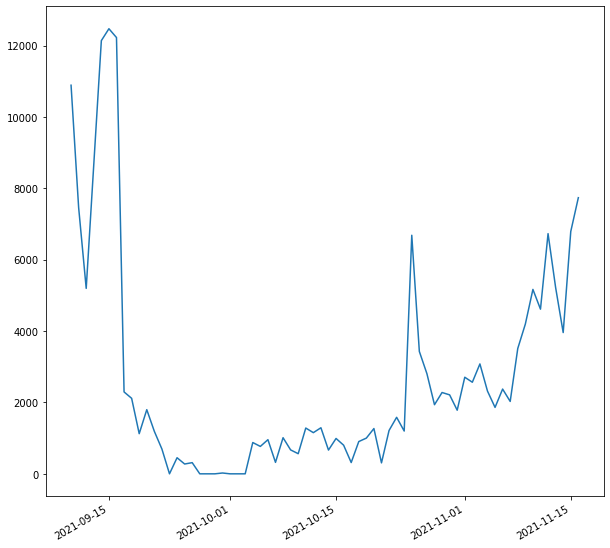

In [147]:
df["maxEverMinusBookings"].plot(figsize=(10,10))

In [104]:
df

,Total Free Appts
2021-09-17,8614
2021-09-18,5356
2021-09-19,4118
2021-09-20,8395
2021-09-21,11007
...,...
2021-11-16,4458
2021-09-14,56
2021-09-15,64
2021-09-16,230
